In [18]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

plt.style.use('dark_background') # I love dark mode.

In [19]:
# Load the data
drs_data = pd.read_excel("../data/drs_data.xlsx", header=0)
# Print the total number of challenges in the dataset
print("Total number of challenges in the dataset: ", drs_data.shape[0])

Total number of challenges in the dataset:  115


In [21]:
# Who took the reviews - Batting side or Fielding side?
drs_data['Review By Batting/Fielding'] = drs_data['Review By'].apply(lambda x: 'Batting' if x == drs_data['Batting Team'].values[0] else 'Fielding')

In [22]:
# Calculate the count of each decision challenged according to which innings it occured in
side_counts = drs_data['Review By Batting/Fielding'].value_counts()
print("Fielding teams challenged umpire decisions", side_counts.iloc[0], "times, accounting for", round(side_counts.iloc[0]/side_counts.sum()*100, 2), "% of all challenges.")
print("Batting teams challenged umpire decisions", side_counts.iloc[1], "times, accounting for", round(side_counts.iloc[1]/side_counts.sum()*100, 2), "% of all challenges.")

Fielding teams challenged umpire decisions 97 times, accounting for 84.35 % of all challenges.
Batting teams challenged umpire decisions 18 times, accounting for 15.65 % of all challenges.


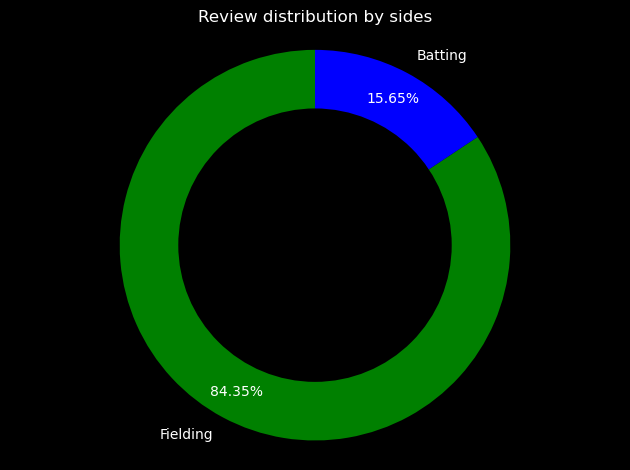

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Create a pie chart
ax.pie(drs_data['Review By Batting/Fielding'].value_counts(),
       labels=drs_data['Review By Batting/Fielding'].value_counts().index.to_list(),
       autopct='%1.2f%%',
       colors=["green", "blue"],
       pctdistance=0.85,
       startangle=90)
ax.set_title('Review distribution by sides')
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='black')
fig.gca().add_artist(centre_circle)
ax.axis("equal")
plt.tight_layout()
plt.savefig("../plots/teams_distribution_reviews.png", bbox_inches='tight', dpi=720)
plt.show()